# Callin Switzer
## Compare NNet preds with numerical solutions

In [ ]:
# do simulations first with file, 005_RunSimulation_FromNNET

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import os
import pandas as pd
import time
from datetime import datetime
import sys
import csv
import seaborn as sns
import scipy.io
import subprocess
import csv

print(sys.version, "\n")

now = datetime.now()
print("last run on " + str(now))

#%qtconsole

# define directories
baseDir = os.getcwd()
dataDir = r'D:\MothSimulations\11c-AggressiveManeuver\Qstore\hws_am_con'
figDir = r'D:\Dropbox\AcademiaDropbox\mothMachineLearning_dataAndFigs\Figs'
dataOutput = r'D:\Dropbox\AcademiaDropbox\mothMachineLearning_dataAndFigs\DataOutput'
savedModels = r'D:\Dropbox\AcademiaDropbox\mothMachineLearning_dataAndFigs\savedModels'
randomRawData = r'D:/Dropbox/AcademiaDropbox/mothMachineLearning_dataAndFigs/PythonGeneratedData'

if not os.path.exists(dataOutput):
    os.mkdir(dataOutput)
if not os.path.exists(savedModels):
    os.mkdir(savedModels)


3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)] 

last run on 2019-01-02 13:44:10.365518


In [2]:
# check to make sure it aligns with my original dataset
orDat = pd.read_csv(os.path.join(dataOutput, "NNpreds_small_RandomICs.csv"))
orDat.shape

(1000, 19)

In [3]:
orDat.head()

,x_0,y_0,phi_0,theta_0,x_dot_0,y_dot_0,phi_dot_0,theta_dot_0,F_pred,alpha_pred,tau_pred,x_99,y_99,phi_99,theta_99,x_dot_99_pred,y_dot_99_pred,phi_dot_99_pred,theta_dot_99_pred
0,0.0,0.0,5.717836,2.903536,1140.923218,-399.095208,-20.919668,7.162696,5242.905,0.227884,87642.836,21.425903,-8.116010,5.438490,2.756136,966.60364,-434.46356,-11.772325,-5.640531
1,0.0,0.0,3.799657,4.295602,1216.867455,1286.049934,9.030914,5.734873,21598.404,2.597742,-67889.390,27.849758,27.358930,3.870090,4.277221,1548.62660,1466.32930,-1.445739,-6.679240
2,0.0,0.0,1.426920,3.170749,1008.157261,175.219341,-19.672703,-17.241171,23363.543,1.863295,-15468.784,20.439296,-0.898106,1.004533,2.738070,1000.94440,-266.57200,-23.733850,-25.134838
3,0.0,0.0,1.401717,4.076364,-1022.919335,-980.612881,-9.282598,-20.555771,32194.880,3.678808,68082.640,-19.039632,-13.359467,1.199188,3.981795,-955.95240,-369.71906,-4.945975,0.057465
4,0.0,0.0,0.350069,5.063611,827.387703,1371.685241,2.420546,-2.941864,15569.313,3.173099,-8812.373,15.881660,29.669649,0.238542,4.952067,745.15857,1623.83780,-10.901551,-11.416786


In [4]:
#sns.pairplot(orDat.iloc[:, 15:20])


In [5]:
# read in data
predWSim = pd.read_csv(os.path.join(dataOutput, "SimVsNNet_Locations_Full.csv") )

In [6]:
# remove empty column
predWSim.dropna(axis = 1, inplace= True)

In [7]:
print(predWSim.shape)
predWSim.head()

(1000000, 38)


,x0,x_99_sim,xd0,xd_99_sim,y0,y_99_sim,yd0,yd_99_sim,theta0,theta_99_sim,...,x_99,y_99,phi_99,theta_99,x_dot_99_pred,y_dot_99_pred,phi_dot_99_pred,theta_dot_99_pred,x_0,y_0
0,0.0,9.379389,541.507416,420.184887,0.0,7.392332,502.568101,257.376476,6.272284,6.568415,...,9.347785,7.688051,0.654225,6.544707,385.62134,308.52344,16.010592,19.736385,0,0
1,0.0,23.529992,1409.737698,938.944959,0.0,23.770529,995.727369,1376.972395,2.831231,3.128542,...,23.603876,23.633075,2.267903,3.124010,950.20660,1405.04260,16.328537,12.697647,0,0
2,0.0,11.582655,880.949432,288.327905,0.0,2.314977,178.694952,68.413969,3.740158,3.395991,...,11.786005,2.540601,0.827989,3.401310,314.93234,81.49345,-21.342203,-26.094006,0,0
3,0.0,-33.084097,-1401.856110,-1945.563196,0.0,-30.962052,-1363.320818,-1738.027627,3.084163,2.948369,...,-33.335655,-30.535096,4.439168,2.988790,-1989.83980,-1614.85940,2.205544,2.750597,0,0
4,0.0,25.778578,1420.324857,1191.824819,0.0,13.682106,545.096025,839.543279,4.596070,4.446137,...,26.205825,13.510248,5.767939,4.434904,1218.60990,845.32600,-6.078696,-8.131236,0,0


In [8]:
predWSim.columns

Index(['x0', 'x_99_sim', 'xd0', 'xd_99_sim', 'y0', 'y_99_sim', 'yd0',
       'yd_99_sim', 'theta0', 'theta_99_sim', 'thetad0', 'thetad_99_sim',
       'phi0', 'phi_99_sim', 'phid0', 'phid_99_sim', 'F', 'alpha', 'tau0',
       'phi_0', 'theta_0', 'x_dot_0', 'y_dot_0', 'phi_dot_0', 'theta_dot_0',
       'F_pred', 'alpha_pred', 'tau_pred', 'x_99', 'y_99', 'phi_99',
       'theta_99', 'x_dot_99_pred', 'y_dot_99_pred', 'phi_dot_99_pred',
       'theta_dot_99_pred', 'x_0', 'y_0'],
      dtype='object')

In [9]:
# Check that items are aligned
#np.allclose(orDat.iloc[:, 0:10], predWSim.iloc[:, 0:10], rtol = 1e-04)

Text(0.5,0,'predicted')

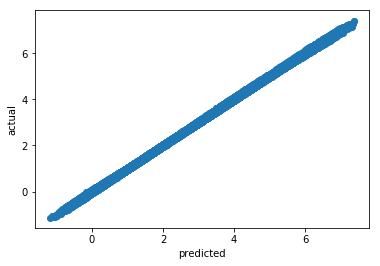

In [10]:
plt.scatter(x = predWSim.loc[:, "theta_99"], y =  predWSim.loc[:,  "theta_99_sim"] )
plt.ylabel("actual")
plt.xlabel("predicted")
#plt.hlines(y = 0, xmin = -10, xmax = 10)


In [11]:
# change column order because phi and theta are out of order
predWSim = predWSim[['x_0', 'y_0', 'phi_0', 'theta_0', 'x_dot_0', 
                     'y_dot_0', 'phi_dot_0','theta_dot_0', 
                     'F_pred', 'alpha_pred', 'tau_pred', 
                     'x_99', 'y_99', 'phi_99', 'theta_99', 
                     'x_dot_99_pred', 'y_dot_99_pred','phi_dot_99_pred', 'theta_dot_99_pred', 
                     'x_99_sim', 'y_99_sim','phi_99_sim', 'theta_99_sim', 
                     'xd_99_sim', 'yd_99_sim','phid_99_sim', 'thetad_99_sim']]

In [12]:
predWSim.columns

Index(['x_0', 'y_0', 'phi_0', 'theta_0', 'x_dot_0', 'y_dot_0', 'phi_dot_0',
       'theta_dot_0', 'F_pred', 'alpha_pred', 'tau_pred', 'x_99', 'y_99',
       'phi_99', 'theta_99', 'x_dot_99_pred', 'y_dot_99_pred',
       'phi_dot_99_pred', 'theta_dot_99_pred', 'x_99_sim', 'y_99_sim',
       'phi_99_sim', 'theta_99_sim', 'xd_99_sim', 'yd_99_sim', 'phid_99_sim',
       'thetad_99_sim'],
      dtype='object')

In [13]:
predsNames = ["_".join(jj.split("_")[0:3])  for jj in predWSim.columns[11:19]]
actualNames = ["_".join(jj.split("_")[0:-1]) + "_actual" for jj in predWSim.columns[19:]]
nms = [predsNames[ii][0:len(predsNames[ii])-3] + "_final" for ii in range(len(predsNames))]
print(predsNames)
print(actualNames)
print(nms)

['x_99', 'y_99', 'phi_99', 'theta_99', 'x_dot_99', 'y_dot_99', 'phi_dot_99', 'theta_dot_99']
['x_99_actual', 'y_99_actual', 'phi_99_actual', 'theta_99_actual', 'xd_99_actual', 'yd_99_actual', 'phid_99_actual', 'thetad_99_actual']
['x_final', 'y_final', 'phi_final', 'theta_final', 'x_dot_final', 'y_dot_final', 'phi_dot_final', 'theta_dot_final']


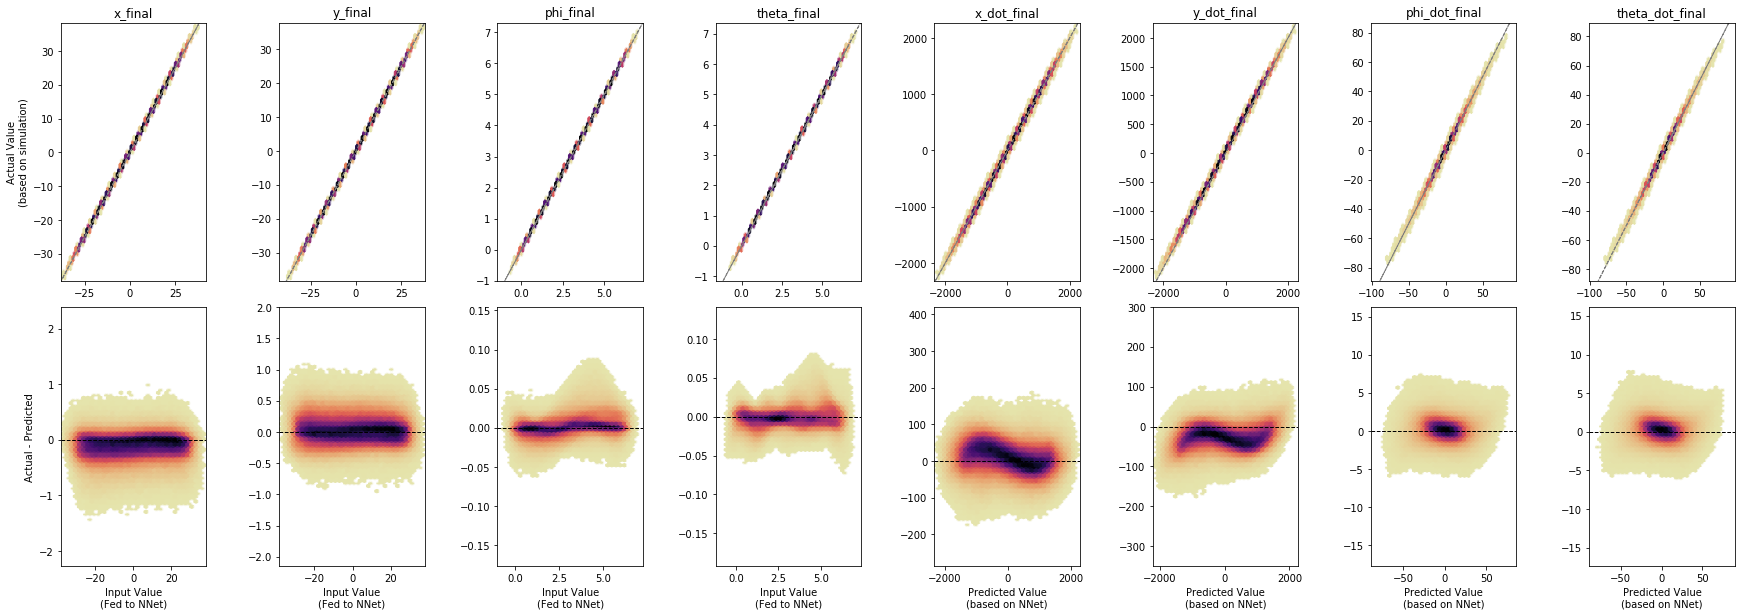

In [14]:
# make plots
plt.close("all")
fig, axs = plt.subplots(2,8, figsize=(30, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.1, wspace=0.5)
#fig.suptitle('Predicted vs. acutal ', fontsize=14, fontweight='bold')

axs = axs.ravel()

# replace lightest colors with white
import matplotlib.colors

cmap = plt.cm.magma_r
cmaplist = np.array([cmap(i) for i in range(cmap.N)])
cmaplist[:,0:3] = np.divide(cmaplist[:, 0:3], 1.1)
cmaplist[0] = (1,1,1,0.5)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('mcm',cmaplist, cmap.N)

for ii in range(len(predsNames)):
    try:
        axs[ii].hexbin(y = predWSim.iloc[:,ii+11],x = predWSim.iloc[:,ii+ 19], gridsize = 50, cmap = cmap)
        #axs[ii].set_xlabel("Predicted Value\n(unscaled)")
        if(ii == 0):
            axs[ii].set_ylabel("Actual Value\n(based on simulation)")
        axs[ii].set_title(nms[ii])
        axs[ii].plot(predWSim.iloc[:,ii+11], predWSim.iloc[:,ii+11], 'grey', linewidth = 1, linestyle  = "--")
    except:
        pass

# residual plots x = predicted, y = actual - predicted
for jj in np.arange(0, len(predsNames)):
    
    ii = jj + 8
    try:
        axs[ii].hexbin(x = predWSim.iloc[:,jj+11],
                     y = predWSim.iloc[:,jj+ 19 ] - predWSim.iloc[:,jj+11], gridsize = (35, 50), cmap = cmap)
        
        if(jj > 3):
            axs[ii].set_xlabel("Predicted Value\n(based on NNet)")
        else:
            axs[ii].set_xlabel("Input Value\n(Fed to NNet)")
        if(jj == 0):
            axs[ii].set_ylabel("Actual - Predicted")
        axs[ii].hlines(y = 0, xmin = np.min(predWSim.iloc[:,jj+11]), 
                       xmax = np.max(predWSim.iloc[:,jj+11]), linestyle =  "--", linewidth = 1)

        
    except:
        pass

#fig.savefig(os.path.join(figDir, "PredVActual_Sim_big.png"), dpi = 500, bbox_inches='tight')
#plt.close()

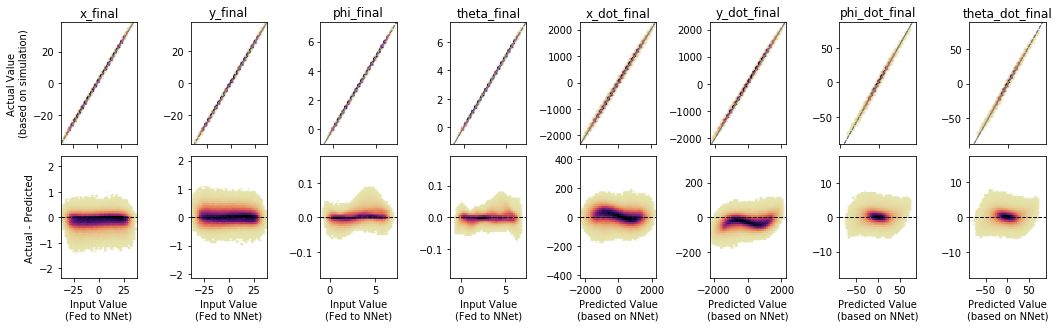

In [15]:
# make plots
plt.close("all")
fig, axs = plt.subplots(2,8, figsize=np.array((30, 8)) / 1.7, facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.1, wspace=0.7)
#fig.suptitle('Predicted vs. acutal ', fontsize=14, fontweight='bold')

axs = axs.ravel()

# replace lightest colors with white
import matplotlib.colors

cmap = plt.cm.magma_r
cmaplist = np.array([cmap(i) for i in range(cmap.N)])
cmaplist[:,0:3] = np.divide(cmaplist[:, 0:3], 1.1)
cmaplist[0] = (1,1,1,0.5)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('mcm',cmaplist, cmap.N)

for ii in range(len(predsNames)):
    try:
        axs[ii].hexbin(y = predWSim.iloc[:,ii+11],x = predWSim.iloc[:,ii+ 19], gridsize = 50, cmap = cmap)
        if(ii == 0):
            axs[ii].set_ylabel("Actual Value\n(based on simulation)")
        axs[ii].set_title(nms[ii])
        axs[ii].plot(predWSim.iloc[:,ii+11], predWSim.iloc[:,ii+11], 'grey', linewidth = 1, linestyle  = "--")
        axs[ii].axes.xaxis.set_ticklabels([])
    except:
        pass

# residual plots x = predicted, y = actual - predicted
for jj in np.arange(0, len(predsNames)):
    
    ii = jj + 8
    try:
        axs[ii].hexbin(x = predWSim.iloc[:,jj+11],
                     y = predWSim.iloc[:,jj+ 19 ] - predWSim.iloc[:,jj+11], gridsize = (35, 50), cmap = cmap)
        
        mmin = np.min(predWSim.iloc[:,jj+ 19 ] - predWSim.iloc[:,jj+11])
        mmax = np.max(predWSim.iloc[:,jj+ 19 ] - predWSim.iloc[:,jj+11])
        
        upper = np.max([np.abs(mmin), np.abs(mmax)])
        
        axs[ii].set_ylim(-upper, upper)
        
        if(jj > 3):
            axs[ii].set_xlabel("Predicted Value\n(based on NNet)")
        else:
            axs[ii].set_xlabel("Input Value\n(Fed to NNet)")
        if(jj == 0):
            axs[ii].set_ylabel("Actual - Predicted")
        axs[ii].hlines(y = 0, xmin = np.min(predWSim.iloc[:,jj+11]), 
                       xmax = np.max(predWSim.iloc[:,jj+11]), linestyle =  "--", linewidth = 1)

        
    except:
        pass

fig.savefig(os.path.join(figDir, "PredVActual_Sim__largeTxt2_Full.png"), dpi = 500, bbox_inches='tight')
#plt.close()

In [ ]:
upper = np.max([np.abs(mmin), np.abs(mmax)])
upper

___
### Calculate some accuracy metrics
___



In [16]:
from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score

In [17]:
for ii in range(len(nms)):
    #np.sqrt(mean_squared_error(Ytest.iloc[0:1000,ii], nnpreds_unscaled[:,ii]))
    print(r2_score(predWSim.iloc[:,ii+11], predWSim.iloc[:,ii+ 19]), nms[ii])

0.999718457360824 x_final
0.9998092109202936 y_final
0.9999201546694216 phi_final
0.9999286322347134 theta_final
0.9975937483506001 x_dot_final
0.9978315703634997 y_dot_final
0.9941129753796684 phi_dot_final
0.9943089668456955 theta_dot_final


In [ ]:
# # load model
# from keras.models import load_model

In [ ]:
# model = load_model(os.path.join(savedModels, 'my_model.h5'))

In [ ]:
# model.summary()

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(predWSim.x_99, predWSim.x_a)

In [ ]:
mean_squared_error(predWSim.y_99, predWSim.y_a)

In [ ]:

plt.scatter(x = predWSim.x_99,
                     y = predWSim.x_a - predWSim.x_99)

In [ ]:
# check how many inputs were in the training set

In [ ]:
dataDir2 = r"D:\Dropbox\mothMachineLearning_dataAndFigs\DataOutput"
trainDF2 = pd.read_csv(os.path.join(dataDir2, "smallDF.csv"))
trainDF2.head()

In [ ]:
X = trainDF2.loc[:, ["x_0", "y_0", "phi_0", "theta_0", 
                    "x_99", "y_99", "phi_99", "theta_99", 
                   "x_dot_0", "y_dot_0", "phi_dot_0", "theta_dot_0"]]

Y = trainDF2.loc[:, ["Fx", "Fy", "tau", "x_dot_99", "y_dot_99", 
                    "phi_dot_99", "theta_dot_99"] ]

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state = 123)

In [ ]:
Xtrain.shape

In [ ]:
# check for duplicates in xtrain and xtest -- no exact duplicates
aa = Xtrain.merge(Xtest, how="inner")
print(aa.shape)
print(aa.drop_duplicates().shape)
aa.head()

In [ ]:
# check just initial conditions w/0 derivatives -- all are in test set
aa = Xtrain.iloc[:, 0:4].drop_duplicates().merge(Xtest.iloc[:,0:4].drop_duplicates(), how="inner")
print(aa.shape)
print(aa.drop_duplicates().shape)
aa.head()

In [ ]:
Xtrain.iloc[:, 0:5].head()

In [ ]:
trainDF2.x_0.nunique(), Xtrain.x_0.nunique()

In [ ]:
trainDF2.y_99.nunique(), Xtrain.y_99.nunique()

In [ ]:
comparDF = Xtrain.loc[:, ['x_0', 'y_0', 'phi_0', 'theta_0', 'x_dot_0', 'y_dot_0',
       'phi_dot_0', 'theta_dot_0']]
len(comparDF)

In [ ]:
comparDF.drop_duplicates(inplace=True)

In [ ]:
comparDF.shape

In [ ]:
cdf2 = orDat.loc[:, comparDF.columns]#.drop_duplicates()

In [ ]:
print(cdf2.shape)
cdf2.head()

In [ ]:
# lots of our starting conditions are also in the training set ~ 592/1000

aa = cdf2.merge(comparDF, how="inner")
print(aa.shape)
print(aa.drop_duplicates().shape)
aa.head()

In [ ]:
comparDF.loc[comparDF.x_0 == aa.iloc[0,0],:]

In [ ]:
comparDF = Xtrain.loc[:, ['x_0', 'y_0', 'phi_0', 'theta_0', 
                          'x_dot_0', 'y_dot_0','phi_dot_0', 'theta_dot_0', 
                          "x_99", "y_99", "phi_99", "theta_99"]].drop_duplicates()
cdf2 = orDat.loc[:, comparDF.columns]#.drop_duplicates()

In [ ]:
comparDF.shape

In [ ]:
bb = pd.merge(cdf2, comparDF, how='inner')
print(bb.shape)
print(bb.drop_duplicates().shape)
bb.head()

In [ ]:
np.sum(cdf2.x_0.isin(comparDF.x_0) & cdf2.y_0.isin(comparDF.y_0) & cdf2.y_99_pred.isin(comparDF.y_99))